Here are some recommended packages, not all are required and depends on your solution.

In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

## Part 1: Questions

You are a consultant for a company that sells widgets.  They have historical data on their sales on their investments in advertising in various media outlets, including TV, radio, and newspapers.  On the basis of this data, how should they be spending their advertising money in the future?

      TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9


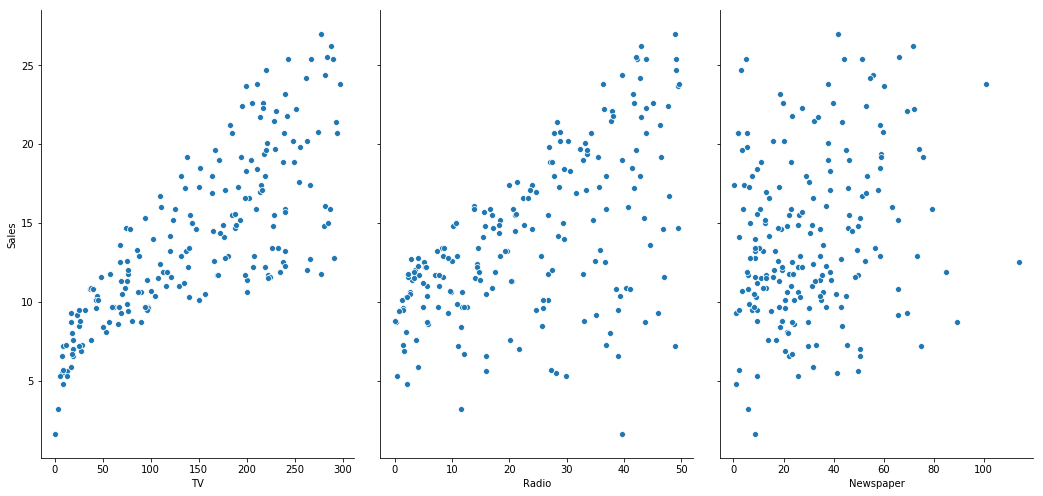

In [2]:
# read data into a DataFrame, this is money spent on different medias
data = pd.read_csv('https://raw.githubusercontent.com/lneisenman/isl/master/data/Advertising.csv', index_col=0)
print(data.head())
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7)


In the lecture, we covered how to perform a linear regression model.  We did not however explore how "good" this model is.  The task below will have you identifying ways to evaluate a linear regression model.

Machine learning focuses on what the model predicts. If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the Statsmodels Python package. Take some time to look at this [package](https://www.statsmodels.org/stable/regression.html) and also an [example of evaluating a linear regression](https://www.statsmodels.org/stable/examples/notebooks/generated/gls.html).

Similar to Scikit-learn, one can calculate the intercept and coefficient for a linear fit for a set of data.  

In [3]:
mod = sm.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = data).fit()
mod.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

A confidence interval can be used to describe a linear model.  How would you calculate the confidence interval of this model and what does this confidence interval mean?

The calculated confidence intervals of this model are showing below. The confidence interval means, take TV as an example, we are 95% confident that the population coefficient of TV related to sales is between 0.043014 and 0.048516. 

In [4]:
mod.conf_int(alpha = 0.05)

,0,1
Intercept,2.323762,3.554016
TV,0.043014,0.048516
Radio,0.171547,0.205513
Newspaper,-0.012616,0.010541


Other metrics that are used to describe the appropriateness of a model is a p-value.  How would you calculate the p-value and r-squared values of the model?  What do these values mean?

The probability that new coefficient of newspaper related to sales is more extreme than the calculated coefficient would be 0.86. The r-squared value means the model explains 89.7% of the data variability around its mean. 

In [5]:
mod.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
Radio        1.505339e-54
Newspaper    8.599151e-01
dtype: float64

In [6]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.58e-96
Time:                        14:49:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Yes, the three ads have relationship with sales, they promoted sales in different degrees. According to data analysis, p-values for TV and radio are almost zero which suggest they have  very strong relationship with sales. The coefficients of TV and radio show that they contribute to sales. TV and radio would increase the sales, but newspaper ad decreases the sales. Yes, with the ad spending in each market, the sales can be predicted. 

## Part 2: Own Data
The annual expenses of various livestock markets were monitored and recorded in the following dataset. The livestocks are cattle, calves, pigs, and lambs. The question is how do annual expenses depend on the number of animals sold?

In [7]:
# Read the dataset into DataFrame
data2 = pd.read_csv('https://raw.githubusercontent.com/joyleeisu/ABE516X-Linear-Regression/master/data.csv', index_col=0)
print(data2.head())

   Cattle  Calves   Pigs  Lambs  Expenses  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
1    3437    5791   3268   1649     27698         NaN         NaN         NaN   
2   12801    4558   5751  14375     57634         NaN         NaN         NaN   
3    6136    6223  15175   2811     47172         NaN         NaN         NaN   
4   11685    3212    639    964     49295         NaN         NaN         NaN   
5    5733    3220    534   2052     24115         NaN         NaN         NaN   

   Unnamed: 9  Unnamed: 10  Unnamed: 11  Unnamed: 12  
1         NaN          NaN          NaN          NaN  
2         NaN          NaN          NaN          NaN  
3         NaN          NaN          NaN          NaN  
4         NaN          NaN          NaN          NaN  
5         NaN          NaN          NaN          NaN  


In [8]:
# Remove the empty columns
td = data2.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],axis = 1)
td.head()

,Cattle,Calves,Pigs,Lambs,Expenses
1,3437,5791,3268,1649,27698
2,12801,4558,5751,14375,57634
3,6136,6223,15175,2811,47172
4,11685,3212,639,964,49295
5,5733,3220,534,2052,24115


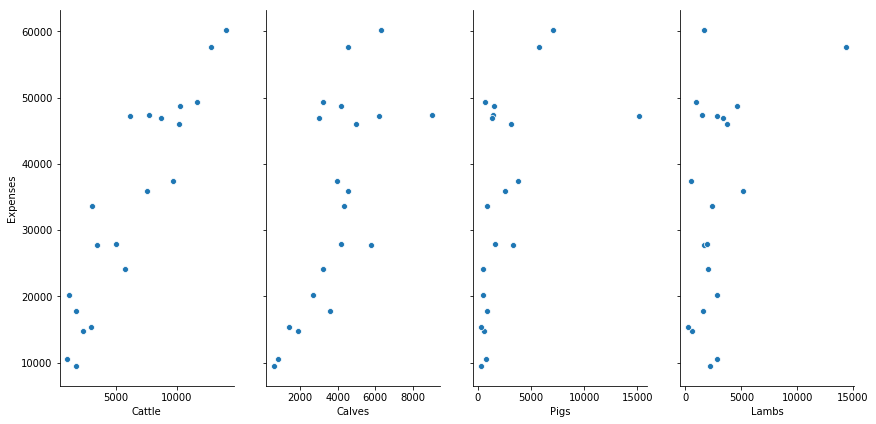

In [9]:
# Visualize the relationship 
sns.pairplot(data2, x_vars=['Cattle','Calves','Pigs','Lambs'], y_vars='Expenses', height=6, aspect=0.5)

In [10]:
# Calculate the linear fit
mod2 = sm.ols(formula = 'Expenses ~ Cattle + Calves + Pigs + Lambs', data = data2).fit()
mod2.params

Intercept    5180.514463
Cattle          2.723177
Calves          2.284052
Pigs            0.445789
Lambs           0.459704
dtype: float64

In [11]:
# Show 95% confidence intervals
mod2.conf_int(alpha = 0.05)

,0,1
Intercept,-166.840331,10527.869258
Cattle,2.043216,3.403138
Calves,0.873545,3.694559
Pigs,-0.314551,1.206128
Lambs,-0.371625,1.291032


In [12]:
# Show p-values
mod2.pvalues

Intercept    5.666235e-02
Cattle       3.838453e-07
Calves       3.560986e-03
Pigs         2.305667e-01
Lambs        2.569017e-01
dtype: float64

In [13]:
# Show statistic summary
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:               Expenses   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     53.83
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.02e-08
Time:                        14:49:17   Log-Likelihood:                -194.16
No. Observations:                  20   AIC:                             398.3
Df Residuals:                      15   BIC:                             403.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5180.5145   2508.788      2.065      0.0

Conclusion: There are strong evidence that the annual expenses is affected by the number of cattle, the more number of cattle are sold the higher annual expenses will reach. Moreover, there are evidence that the annual expenses is affected by the number of calves sold, and no evidence that it is affected by number of pigs & lambs sold. The statistic summary showed that the R-squared is 0.935 which is pretty close to 1, and standard error for each livestock is relatively low as well. Thus, this model has effective description of the dataset. Original code and data are posted on github. (https://github.com/joyleeisu/ABE516X-Linear-Regression.git)